# CSI 4142 - Group 48 - Assignment 1

## Introduction
This report is to provide context and insight about 2 different datasets that can be understood for an audience isn't too familiar with data.

### Group 48 Members
- Ali Bhangu - 300234254
- Justin Wang - 300234186

In [62]:
import numpy as npy
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os 

# Part 1 - Heart Failure Prediction Set

In [63]:
heartSet = pd.read_csv('heart.csv')
heartSet

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Dataset Description
- Name: Heart Failure Prediction
- Author: fedesoriano 
- Shape: 12 Columns, 918 Rows

### Dataset Features 
- Age: Numerical | The age of patients in years
- Sex: Categorial | Sex of the Patient 
- ChestPainType: Categorical | Different Chest Pain Types Ex: TA: Typical Angina, ATA; Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptotatic
- RestingBP: Numerical | Resting BP Measured in mm HG
- Cholestrol: Numerical | Serum Cholestrol
- FastingBS: Categorical | If the Blood Sugar > 120mg then 1, Otherwise 0 
- RestingECG: Categorical | With Normal, ST, LVH as the options
- MaxHR: Numerical | Value between 60 and 202
- ExerciseAngina: Categorical | Yes or No -> Exercise Induded Angina
- Oldpeak: Numerical | Numerical Value For ST
- ST_Slope: Categorical | Up, Flat, or Down
- HeartDisease: Categorical | 1 if They Have It & 0 If Not

### Redunancy or Missing Features
For this data set, we have noticed missing value with the RestingBP cateogry, as it is not specified whether it is the Systolic blood pressure or Disostolic blood pressure with the value given. 

## Insight 1 - Reflection:
This insight showcases a simple histogram for the visualization of the cholestrol dispersion amongst adults in this data set. This insight showcases there is a large scale of people with a healthy Cholestrol level, but it is clearly evident that a majority of people face a cholestrol level of 200. This fulfils the Univariate R1 requirement for numerical data. This evidence was obtained by using the code labeled with the comment "Code for Insight 1". 


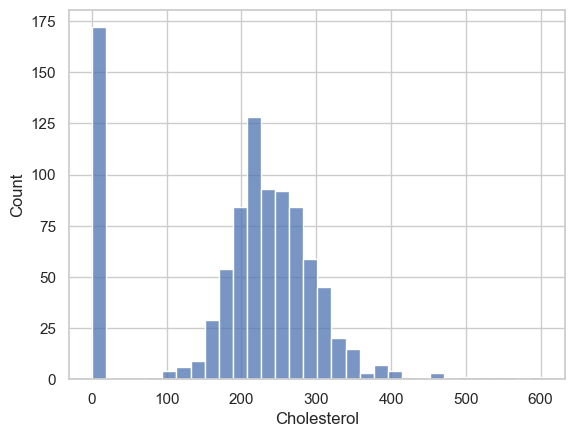

In [38]:
#Code for Insight 1: 

# Creating the graph
sns.histplot(data=heartSet, x="Cholesterol")

# Display the plot
plt.show()

## Insight 2 - This insight showcases the amount of men and women who has and doesn't have heart disease. 

The evidence for this is a grouped-data countplot graph. The x-axis represents the 2 sexes labelled in the dataset, Male and Female. The y-axis represents the amount of people with or without heart disease. The blue bar represents people without heart disease and the orange bar represents people with heart disease.

This insight showcases an r4 bivariente analysis which groups the gender and heart disease values. The 2 bars combined equal the total amount of men and women that appear in the dataset. Each bar just represents how many have heart disease and they are seperated by gender. This graph shows that more men have heart disease than women, there are double the amount of men with heart disease than without, triple the amount of women without heart disease than with, and ten times the amount of men with heart disease than women.

This evidence was obtained by using the code labeled with the comment "Code for Insight 2". 

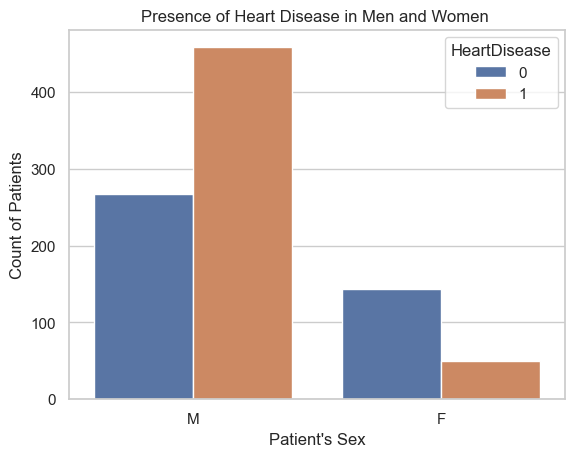

In [39]:
# Code for Insight 2 

# Creating a countplot
sns.countplot(data=heartSet, x="Sex", hue="HeartDisease")
plt.title("Presence of Heart Disease in Men and Women ")
plt.xlabel("Patient's Sex", fontsize=12)
plt.ylabel("Count of Patients" , fontsize=12)

# Showing the graph 
plt.show()

## Insight 3 - The majority of individuals in the dataset have a flat ST slope, while a significantly smaller proportion exhibit a down-sloping ST slope.

The count plot illustrates the distribution of individuals based on their ST slope types (Up, Flat, Down). The x-axis categorizes the ST slope, and the y-axis represents the count of individuals. From the graph: Flat ST slope has the highest count, followed by Up-sloping. Down-sloping ST slope has a minimal count, indicating it is the least common occurrence. 

This count plot is important because the ST Slope provides a snapshot of heart health, with flat and downward slopes often indicating potential cardiac issues. A flat ST slope is associated with myocardial ischemia (reduced blood flow to the heart), while a downward ST slope is particularly concerning as it may suggest severe heart conditions such as complete arterty clogging. 

This was univariate analysis, which fulfils the requirement for r2, as this is a countplot for a category with multiple values focused on Categorical Data. 

This evidence was obtained by using the code labeled with the comment "Code for Insight 3". 

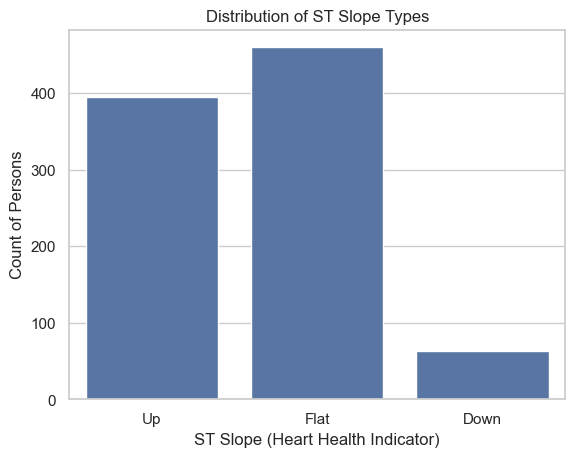

In [40]:
#Code for Insight 3 -> Creating the Countplot

#Creating a count plot from the dataset variable called heartSet and x=ST Slope 
sns.countplot(data=heartSet, x='ST_Slope')
# Setting the X Label 
plt.xlabel("ST Slope (Heart Health Indicator)")
# Setting the Title Label 
plt.title("Distribution of ST Slope Types")
# Setting the Y Label 
plt.ylabel("Count of Persons")

# Displaying the Graph 
plt.show()


## Insight 4 - Patients experiencing 'Unstable' types of chest pain are more likely to have heart disease compared to those with 'Stable' chest pain.

The countplot illustrates the distribution of heart disease between 'Stable' and 'Unstable' chest pain groups. The 'Unstable' group, which includes symptoms like ASY (Asymptomatic) and TA (Typical Angina), shows a significantly higher chance of heart disease compared to the 'Stable' group (ATA () and NAP). This visualization underscores the importance of chest pain type as an indicator of potential heart issues, with 'Unstable' pains linked to more severe conditions.

This analysis, categorized as r3 (Grouped-Data countplot), reveals the critical role of chest pain classification in predicting heart disease risk, emphasizing targeted clinical attention for 'Unstable' symptoms.

This evidence was obtained by using the code labeled with the comment "Code for Insight 4". 

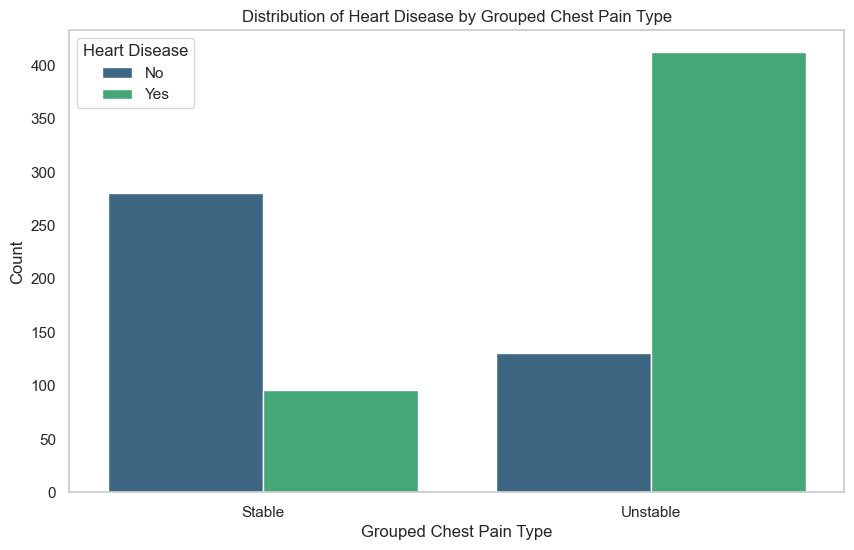

In [48]:
#Code for Insight 4 

# Grouping Chest Pain Grouped

# Replacing the different types of chest pain types into Stable or Unstable, a thorough explanation can be found in our insight above. 
heartSet['ChestPainGrouped'] = heartSet['ChestPainType'].replace({
    'ATA': 'Stable', 
    'NAP': 'Stable', 
    'ASY': 'Unstable', 
    'TA': 'Unstable',
    })

# Setting the graph size 
plt.figure(figsize=(10, 6))

# Setting up a Count Plot with a neat colour palette
sns.countplot(x='ChestPainGrouped', hue='HeartDisease', data=heartSet, palette='viridis')

# Adding the title, xlabel, and ylabel  
plt.title('Distribution of Heart Disease by Grouped Chest Pain Type')
plt.xlabel('Grouped Chest Pain Type')
plt.ylabel('Count')

# Adding a grid and legend to make the graph look neater 
plt.grid(axis='y')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


## Insight 5 - People with normal resting electrocardiogram (ECG) have more healthier max heart rates. 

The evidence for this is a grouped-data countplot graph. The x-axis represents the different types of resting ECGs labelled in the dataset, normal, ST and LVH. The y-axis represents the amount of people of different max heart rates. The blue bar represents 0-75 HR, orange bar represents 76-100 HR, green bar represents 101-125 HR, red bar represents 126-150 HR, purple bar represents 151-175 HR, and brown bar represents 176-200 HR.

This insight showcases an r5 bivariente analysis which groups the resting ECG and MaxHR values. The values were aligned with in ascending numerical order. 

This evidence was obtained by using the code labeled with the comment "Code for Insight 5". 

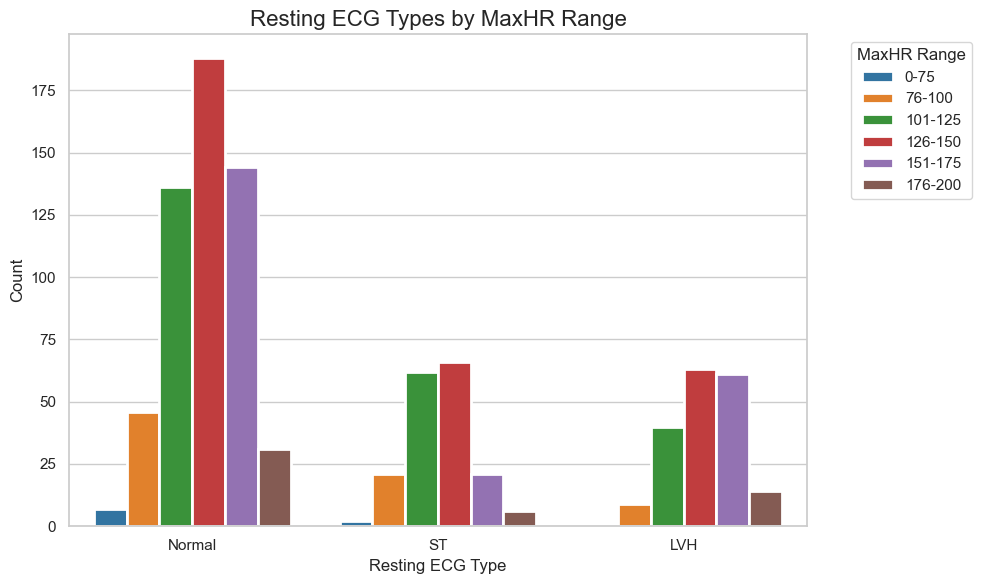

In [ ]:
# Code for Insight 5

# Adjust the figure size for better visibility
plt.figure(figsize=(10, 6))
bins = [0, 75, 100, 125, 150, 175, 200]
labels = ['0-75', '76-100', '101-125', '126-150', '151-175', '176-200']
heartSet['MaxHR_Group'] = pd.cut(heartSet['MaxHR'], bins=bins, labels=labels, right=True)

# Create a countplot with original bins for MaxHR as the hue and improved aesthetics
sns.countplot(
    data=heartSet,
    x="RestingECG",
    hue="MaxHR_Group",  # Use the defined bins without additional grouping
    linewidth=2,  # Thicker lines for bars
    palette="tab10"  # Distinct colors for each range
)

# Enhance the plot with a title and axis labels
plt.title("Resting ECG Types by MaxHR Range", fontsize=16)
plt.xlabel("Resting ECG Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Display the plot with a legend
plt.legend(title="MaxHR Range", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



## Insight 6 - Age Correlates with Increased Resting Blood Pressure

The scatterplot analysis suggests that resting blood pressure increases with age. This insight is crucial as it aligns with the known trend that older individuals often have higher blood pressures, which could elevate the risk of cardiovascular diseases.

This evidence was obtained by using the code labeled with the comment "Code for Insight 6". 

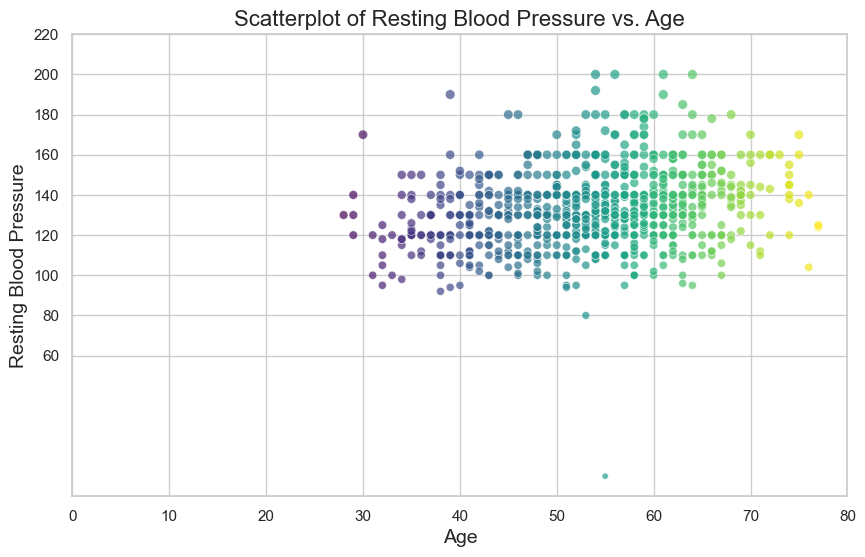

In [14]:
# Code for Insight 6

sns.set(style="whitegrid")
palette = sns.color_palette("viridis", as_cmap=True)

# Create a scatterplot for Age vs RestingBP
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Age', y='RestingBP', data=heartSet,
                          hue='Age', size='RestingBP', sizes=(20, 50),
                          palette=palette, legend=None, alpha=0.7)
plt.title('Scatterplot of Resting Blood Pressure vs. Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Resting Blood Pressure', fontsize=14)
scatter.set_xticks(range(0, 81, 10))  # Setting x-axis ticks to show age every 10 years
scatter.set_yticks(range(60, 221, 20)) # Adjust as necessary for better visualization
plt.grid(True)
plt.show()

## Insight 7 -  Individuals aged 60 and above are more likely to exhibit a "Flat" or "Down" ST_Slope pattern compared to younger indivuduals.

The violin plot reveals that the majority of individuals with "Flat" and "Down" ST_Slope types are concentrated in the 60+ age group, whereas younger individuals are more likely to display the "Up" ST_Slope. This suggests that age plays a key role in determining ST Slope patterns, potentially linked to differences in cardiac health and stress tolerance.

This insight leverages an r7 (numerical/categorical) analysis, comparing the distribution of ages across the ST_Slope categories to uncover potential associations.

The evidence was obtained using the code labeled "Code for Insight 7."

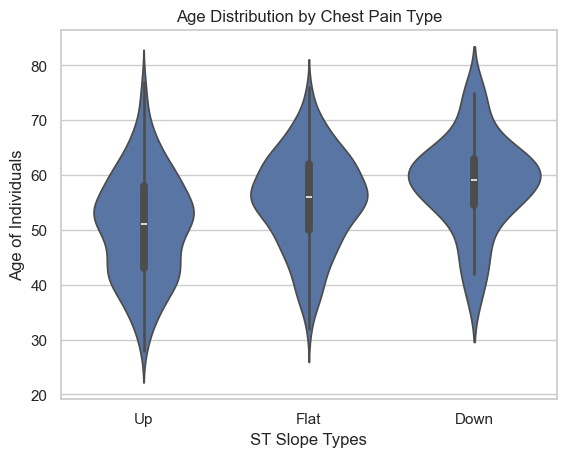

In [30]:
# Code for Insight 7 

# Creating a Violin Plot graph
sns.violinplot(data=heartSet, x="ST_Slope", y="Age")

# Setting the title and labels
plt.title("Age Distribution by Chest Pain Type")
plt.xlabel("ST Slope Types")
plt.ylabel("Age of Individuals")
# Showing the graph: 
plt.show()

## Insight 8 - Heart Disease is more prevalent in individuals aged 50 and above, showing a higher risk in older populations.

The evidence for this is a countplot graph. The x-axis represents two age groups: "Below 50" and "50 and above," while the y-axis represents the number of people in each group. The graph is further divided into two colors: blue bars represent individuals without heart disease, and orange bars represent individuals with heart disease.

This insight showcases an r4 bivariate analysis, comparing categorical variables (age groups and heart disease status). The age groups were categorized into "Below 50" and "50 and above" to highlight the increased prevalence of heart disease in older individuals.

This evidence was obtained by using the code labeled with the comment "Code for Insight 8."

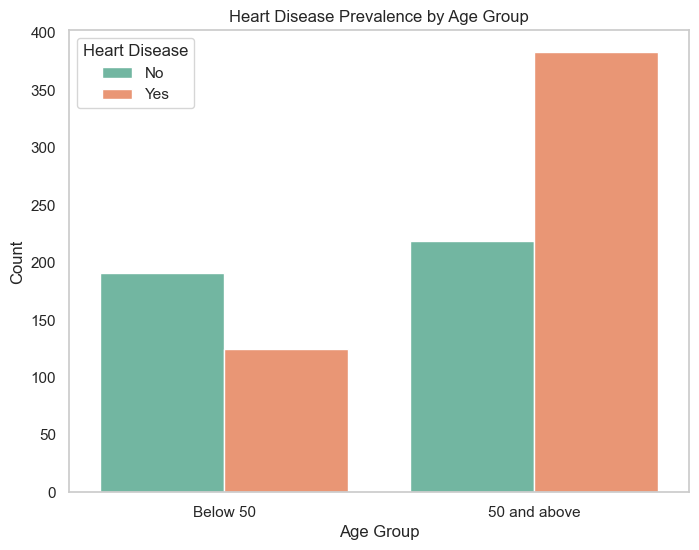

In [ ]:
# Code for Insight 8

# Creating a new categorical group, by taking the numeric category Age and creating a Below 50 and a 50 and Above Category
heartSet['AgeGroup'] = pd.cut(heartSet['Age'], bins=[0, 50, 100], labels=['Below 50', '50 and above'])
plt.figure(figsize=(8, 6))

# Creating a Countplot with X set to Age Group, 
sns.countplot(x='AgeGroup', hue='HeartDisease', data=heartSet, palette='Set2')
plt.title('Heart Disease Prevalence by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.grid(axis='y')
plt.show()


## Insight 9 - People with Heart Disease are More Likely to have Exericse-Induced Angina

The evidence for this insight can be found with the count plot graph below. In this graph, it shows that the amount of people without heart disease are 7x more likely to also not have exercise-induced angina. Meanwhile, the number of people with heart disease and exercise-induced angina is greater than people without.

For this analysis, we used the univariate analysis technique of using a count plot graph with multiple values

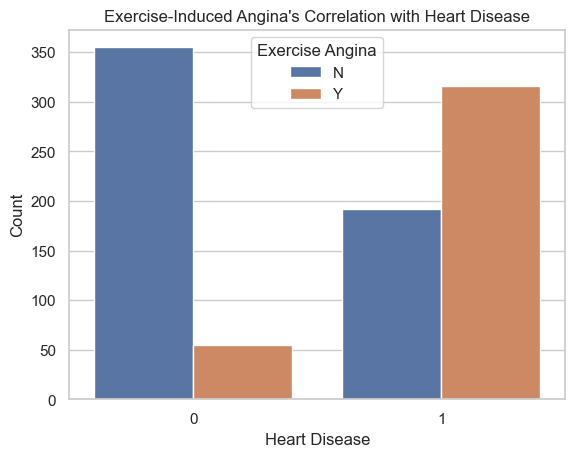

In [54]:
# Code for Insight 9

# Creating a countplot
sns.countplot(data=heartSet, x="HeartDisease", hue="ExerciseAngina")
plt.title("Exercise-Induced Angina's Correlation with Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.legend(title="Exercise Angina")
plt.show()

## Insight 10 - Elevated Fasting Blood Sugar is a Strong Indicator of Heart Disease

This insight highlights the relationship between fasting blood sugar levels (FastingBS) and heart disease prevalence. Patients with fasting blood sugar levels above 120 mg/dL (FastingBS = 1) show a significantly higher likelihood of having heart disease compared to those with normal fasting blood sugar levels (FastingBS = 0). This suggests a strong link between glucose regulation and cardiovascular risk.

This analysis aligns with an r4 bivariate analysis, grouping FastingBS and HeartDisease to illustrate how elevated blood sugar contributes to heart disease prevalence.

The evidence for this insight was obtained using the code labeled with the comment "Code for Insight 10".

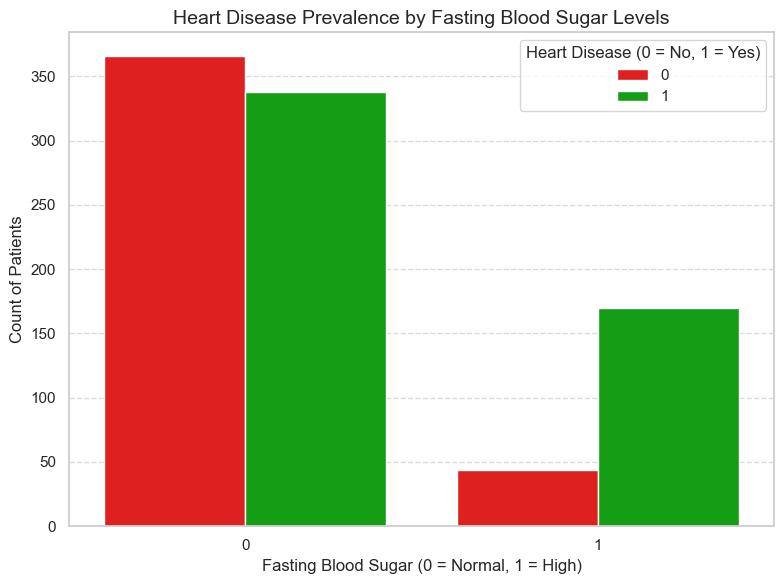

In [59]:
# Code for Insight 10

# Creating the Graph, with X set to Fasting BS, and 
plt.figure(figsize=(8, 6))
sns.countplot(
    data=heartSet,
    x="FastingBS",
    hue="HeartDisease",
    palette=["#ff0000", "#00b300"]
)

# Adding title and labels. 
plt.title("Heart Disease Prevalence by Fasting Blood Sugar Levels", fontsize=14)
plt.xlabel("Fasting Blood Sugar (0 = Normal, 1 = High)", fontsize=12)
plt.ylabel("Count of Patients", fontsize=12)

# Adding a legend and grid lines
plt.legend(title="Heart Disease (0 = No, 1 = Yes)", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Showing the Graph
plt.show()


# Part 2 - Traffic Accidents

In [64]:
trafficSet = pd.read_csv('traffic_accidents.csv')
trafficSet

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,09/13/2023 01:08:00 PM,UNKNOWN,UNKNOWN,UNKNOWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,13,4,9
209302,07/18/2023 02:10:00 PM,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,14,3,7
209303,10/23/2019 01:32:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,INCAPACITATING INJURY,2.0,0.0,2.0,0.0,0.0,0.0,13,4,10
209304,06/01/2020 03:23:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,15,2,6
